# 1. Unzipping The Zip File (Data Reading and Understanding)

In [2]:

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Lambda

In [3]:
!unzip "/content/drive/MyDrive/CNN/CNN_assignment(iit).zip" -d "/content/drive/MyDrive/CNN"

Archive:  /content/drive/MyDrive/CNN/CNN_assignment(iit).zip
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/drive/MyDrive/CNN/Skin cancer ISIC The International 

# 2. Dataset creation

In [4]:
import tensorflow as tf
tf.keras.backend.clear_session()
from keras.preprocessing.image import ImageDataGenerator
data_train = ImageDataGenerator(
    rescale=1./255, #rescaling [0,1]
    validation_split=0.2,
  
)

train_data = data_train.flow_from_directory("/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train",target_size =(180,180),batch_size =32,subset='training')

########################################################

data_val = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)
val_data = data_train.flow_from_directory("/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train",target_size =(180,180),batch_size =32,subset='validation')


############################################################
data_test = ImageDataGenerator(
    rescale = 1./255
)

test_data = data_test.flow_from_directory("/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test",target_size = (180,180),batch_size =32)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [5]:
import numpy as np
class_names = (train_data.class_indices)
print(class_names)
class_names =list(class_names.keys()) 
class_names = np.array(class_names)

{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


# 3. Dataset visualisation

In [4]:
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(train_data))
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(class_names[label_batch[n]==1][0].title())
        plt.axis('off')

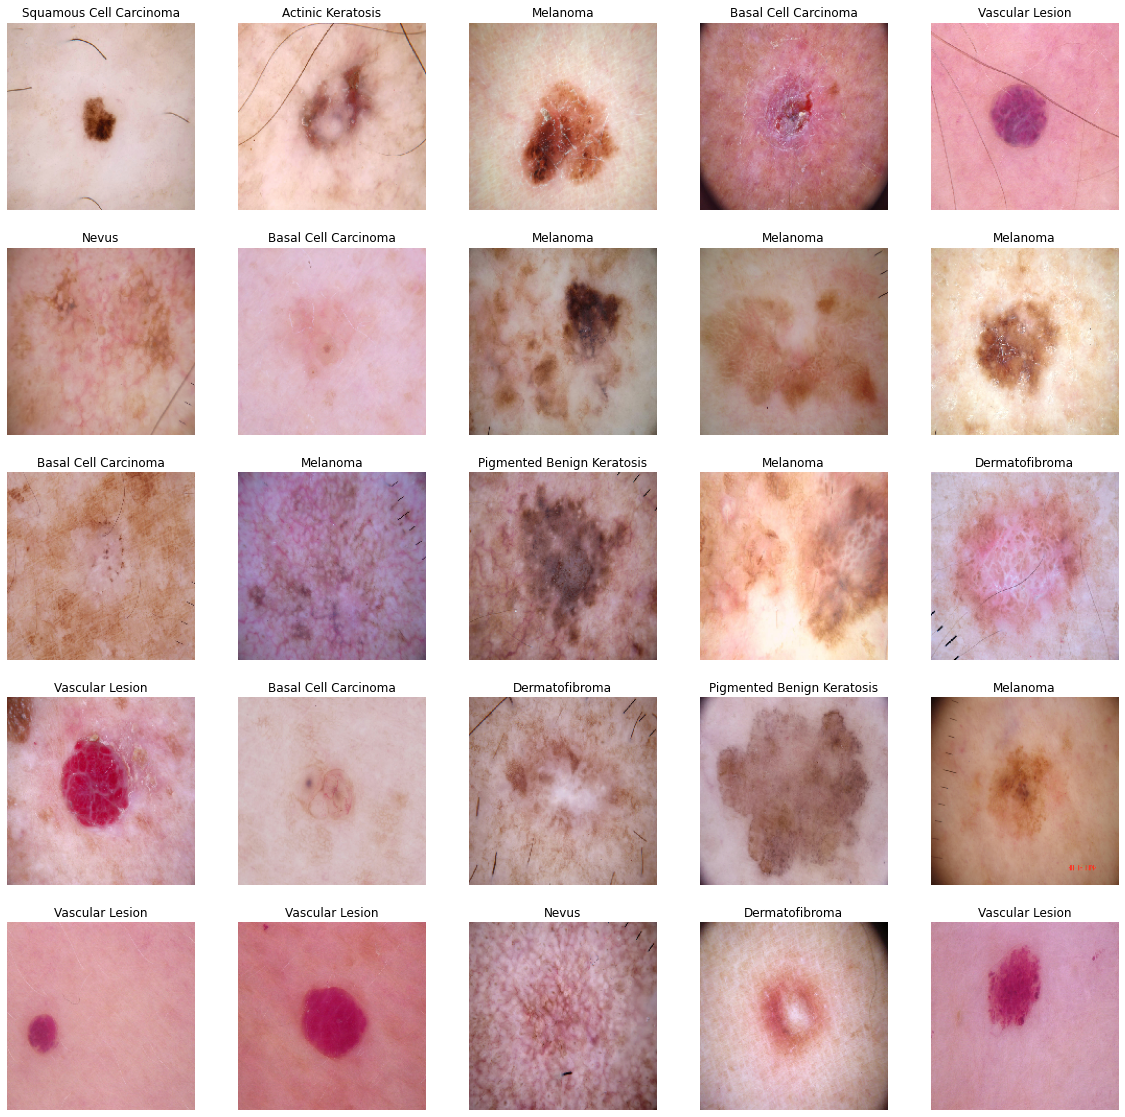

In [85]:
show_batch(image_batch, label_batch)

# Building Moldel -1 

In [30]:
from tensorflow.keras.layers import Dense,Input,Activation,Conv1D,Concatenate,MaxPool1D,Flatten,Dropout

def model_1():
  img_height = 180
  img_width = 180
  channel =3
  
  #inputlayer
  input = layers.Input(shape=(img_height, img_width, channel))

    #Block-1
  one=layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal')(input) 
  two=layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal')(input)
  three=layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal')(input)
   
    #Concatenate Layer
  concatted_1=Concatenate()([one,two,three])
    
    #MAX-Pooling
  max_pool_1=layers.MaxPool2D(pool_size=(2,2))(concatted_1)
    
    #Block-2
  four=layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal')(max_pool_1)
  five=layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal')(max_pool_1)
  six=layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal')(max_pool_1)
    
    #Concatenate Layer
  concatted_2=Concatenate()([four,five,six])
    
    #Max-Pooling
  max_pool_2=layers.MaxPool2D(pool_size=(2,2))(concatted_2)
    
    #Block-3
  seven=layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal')(max_pool_2)

    #Flattening-Layers
  flat=Flatten()(seven)

    #Dense Layer
  last=Dense(512,activation='relu',kernel_initializer='he_normal')(flat)
    
    #DENSE Layer
  add_layer1=Dense(256,activation='relu',kernel_initializer='he_normal')(last)
    
    #Dense-Layer
  add_layer2=Dense(128,activation='relu',kernel_initializer='he_normal')(add_layer1)
    
    #outputl_layer
  output=Dense(9,activation='softmax')(add_layer2)
  
  model = Model(inputs=[input], outputs=[output])

  return model

In [31]:
model = model_1()
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 178, 178, 32) 896         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 178, 178, 32) 896         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 178, 178, 32) 896         input_7[0][0]                    
____________________________________________________________________________________________

# Traning Model-1

In [32]:
from tensorflow.keras.callbacks import  ModelCheckpoint, ReduceLROnPlateau, CSVLogger, TensorBoard, EarlyStopping

def Train_Model_1():
  batch = 32  
  epochs = 20 

  opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.01,
    epsilon=1e-07,
    centered=True,
    name="RMSprop",
)
  metrics = ["acc", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()] #sice its clasification 
                                                                             #using recall and Precsion 
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=metrics) 
  callbacks = [
        ModelCheckpoint("/content/drive/MyDrive/CNN/Model/model_1.h5",monitor = 'val_acc',save_best_only=True),
        ReduceLROnPlateau(monitor='val_acc', factor=0.6,mode='max', patience=5), #Reducing learing rate by factor of(0.5),
                                                                       # new_lr = lr * factor.
        CSVLogger("/content/drive/MyDrive/CNN/Model/data.csv"),
        TensorBoard(),
        EarlyStopping(monitor='val_acc', patience=15,mode= 'max',restore_best_weights=True) #stop traing is val_loss does not change
    ]                                                                             #after 20 epochs.
  history = model.fit(train_data,steps_per_epoch=1795 //32,
                      validation_data = val_data,validation_steps = 444/32,
                      epochs=epochs,
                      callbacks=callbacks)
  tf.keras.models.save_model(model,'/content/drive/MyDrive/CNN/Model/final_model_1.h5')
  
  
  return history


In [33]:
import sys
if __name__ == '__main__':
  config = tf.compat.v1.ConfigProto()
  config.gpu_options.allow_growth = True
  config.allow_soft_placement = True
  sess = tf.compat.v1.Session(config=config)
  tf.compat.v1.keras.backend.set_session(sess)
  if len(sys.argv) > 1:
    gpu = sys.argv[1]
device = '/device:GPU:0' #using Gpu for paced training
with tf.device(device):
  history_1 = Train_Model_1()


Epoch 1/20
56/56 [==============================] - 294s 5s/step - loss: 12.0267 - acc: 0.1860 - recall_3: 0.0346 - precision_3: 0.2194 - val_loss: 2.1121 - val_acc: 0.2072 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00
Epoch 2/20
56/56 [==============================] - 47s 831ms/step - loss: 2.2346 - acc: 0.1860 - recall_3: 0.0102 - precision_3: 0.1895 - val_loss: 2.0669 - val_acc: 0.0923 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00
Epoch 3/20
56/56 [==============================] - 44s 783ms/step - loss: 2.4295 - acc: 0.2456 - recall_3: 0.0425 - precision_3: 0.3247 - val_loss: 2.2734 - val_acc: 0.2005 - val_recall_3: 0.0856 - val_precision_3: 0.4935
Epoch 4/20
56/56 [==============================] - 44s 782ms/step - loss: 2.2080 - acc: 0.2734 - recall_3: 0.0749 - precision_3: 0.4475 - val_loss: 2.1451 - val_acc: 0.3063 - val_recall_3: 0.1081 - val_precision_3: 0.3664
Epoch 5/20
56/56 [==============================] - 48s 833ms/step - loss: 2.1613 - acc: 0.30

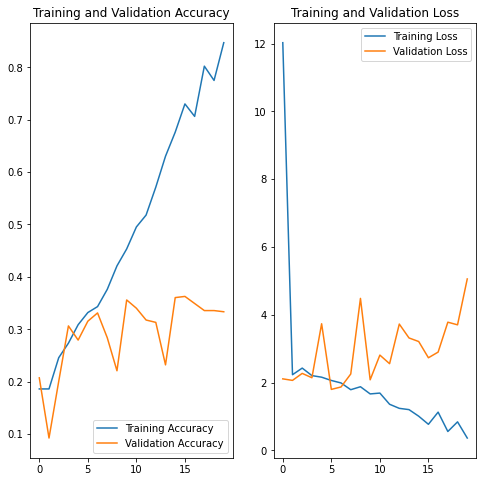

In [36]:
import matplotlib.pyplot as plt

epochs =20
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']

loss=history_1.history['loss']
val_loss=history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Mode-1 Summary

1. In model-1 Kernel size of (3,3) @64 has choosen to get more minuted features from images. I created 3 con2d layer and concatenated them to get larger channel size containing more information, them i did max_pooling (2,2).

2. Optimizer = Rmsprop as it gives momentum which helps if our direction to the minima stucks, on top of that i used lerning rate deacy.

3. The model is clearly ovefitting as the train accuracy is very high and validation accuracy is low.

# Building Model-2


In [37]:
from tensorflow.keras.layers import Dense,Input,Activation,Conv1D,Concatenate,MaxPool1D,Flatten,Dropout

def model_2():
  num_filter = 64
  img_height = 180
  img_width = 180
  channel =3
  
  #inputlayer
  input = layers.Input(shape=(img_height, img_width, channel))

    #Block-1
  one=layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal')(input)
  two=layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal')(input)
  three=layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal')(input)
   
    #Concatenate Layer
  concatted_1=Concatenate()([one,two,three])
    
    #MAX-Pooling
  max_pool_1=layers.MaxPool2D(pool_size=(2,2))(concatted_1)
    
    #Block-2
  four=layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal')(max_pool_1)
  five=layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal')(max_pool_1)
  six=layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal')(max_pool_1)
    
    #Concatenate Layer
  concatted_2=Concatenate()([four,five,six])
    
    #Max-Pooling
  max_pool_2=layers.MaxPool2D(pool_size=(2,2))(concatted_2)
    
    #Block-3
  seven=layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal')(max_pool_2)

    #Flattening-Layers
  flat=Flatten()(seven)

    #Dropout_layer
  drop=Dropout(rate=0.5)(flat)

    #Dense Layer
  last=Dense(512,activation='relu',kernel_initializer='he_normal')(drop)
    # adding extra layers with dropout to avoid overfitting
    #DENSE Layer
  add_layer1=Dense(256,activation='relu',kernel_initializer='he_normal')(last)
    
    #Drop-out layer
  drop1=Dropout(rate=0.5)(add_layer1)
    
    #Dense-Layer
  add_layer2=Dense(128,activation='relu',kernel_initializer='he_normal')(drop1)
    
    #outputl_layer
  output=Dense(9,activation='softmax')(add_layer2)
  
  model = Model(inputs=[input], outputs=[output])

  return model

In [38]:
model_2 = model_2()
model_2.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 178, 178, 64) 1792        input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 178, 178, 64) 1792        input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 178, 178, 64) 1792        input_8[0][0]                    
____________________________________________________________________________________________

In [40]:
from tensorflow.keras.callbacks import  ModelCheckpoint, ReduceLROnPlateau, CSVLogger, TensorBoard, EarlyStopping

def Train_Model_2():
  batch = 32  
  epochs = 20 

  opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.01,
    epsilon=1e-07,
    centered=True,
    name="RMSprop",
)
  metrics = ["acc", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()] #sice its clasification 
                                                                             #using recall and Precsion 
  model_2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=metrics) 
  callbacks = [
        ModelCheckpoint("/content/drive/MyDrive/CNN/Model/model_2.h5",monitor = 'val_acc',save_best_only=True),
        ReduceLROnPlateau(monitor='val_acc', factor=0.6,mode='max', patience=5), #Reducing learing rate by factor of(0.5),
                                                                       # new_lr = lr * factor.
        CSVLogger("/content/drive/MyDrive/CNN/Model/data.csv"),
        TensorBoard(),
        EarlyStopping(monitor='val_acc', patience=15,mode= 'max',restore_best_weights=True) #stop traing is val_loss does not change
    ]                                                                             #after 20 epochs.
  history = model_2.fit(train_data,steps_per_epoch=1795 //32,
                      validation_data = val_data,validation_steps = 444/32,
                      epochs=epochs,
                      callbacks=callbacks)
  tf.keras.models.save_model(model_2,'/content/drive/MyDrive/CNN/Model/final_model_2.h5')
  
  
  return history


In [42]:
if __name__ == '__main__':
  config = tf.compat.v1.ConfigProto()
  config.gpu_options.allow_growth = True
  config.allow_soft_placement = True
  sess = tf.compat.v1.Session(config=config)
  tf.compat.v1.keras.backend.set_session(sess)
  if len(sys.argv) > 1:
    gpu = sys.argv[1]
device = '/device:GPU:0' #using Gpu for paced training
with tf.device(device):
  history_2 = Train_Model_2()


Epoch 1/20
56/56 [==============================] - 99s 966ms/step - loss: 34.9026 - acc: 0.1673 - recall_4: 0.0301 - precision_4: 0.1191 - val_loss: 2.1113 - val_acc: 0.1892 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 2/20
56/56 [==============================] - 54s 946ms/step - loss: 2.0690 - acc: 0.1985 - recall_4: 0.0000e+00 - precision_4: 0.0000e+00 - val_loss: 2.0241 - val_acc: 0.2072 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 3/20
56/56 [==============================] - 51s 912ms/step - loss: 2.9222 - acc: 0.1917 - recall_4: 0.0289 - precision_4: 0.1729 - val_loss: 2.0150 - val_acc: 0.2027 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 4/20
56/56 [==============================] - 51s 908ms/step - loss: 2.0780 - acc: 0.2031 - recall_4: 0.0040 - precision_4: 0.2800 - val_loss: 2.0164 - val_acc: 0.2072 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 5/20
56/56 [==============================] - 51s 905ms/step 

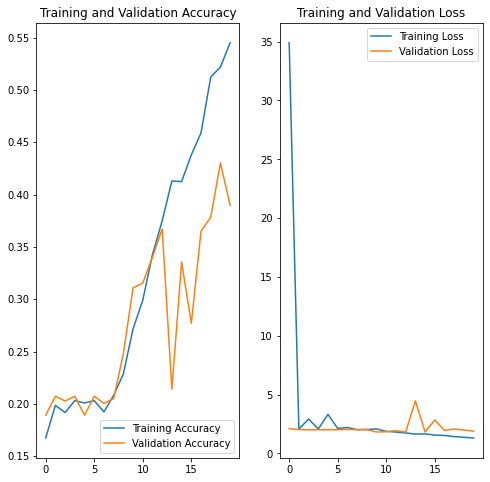

In [43]:
import matplotlib.pyplot as plt

epochs =20
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model-2 Summary

1. In this model i have used (3,3)@128 kernels, I increased the number of kernelswhich increased number of parameters, apart from model-1 the whole architechure of network is same, but i included 2 dropout layers in addtion to try to overcome over fitting.

2. Optimizer is same as Model-1

3. Herei observed that Model-2 is performing better than model-1, the model does not less overfit as the train accuracy and test accuracy is very close, compared to model-1

# Building Model-3 with augmentaion

In [45]:
import pathlib
import os
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [48]:
import pandas as pd
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
1,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
2,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
3,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis
4,/content/drive/MyDrive/CNN/Skin cancer ISIC Th...,actinic keratosis


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


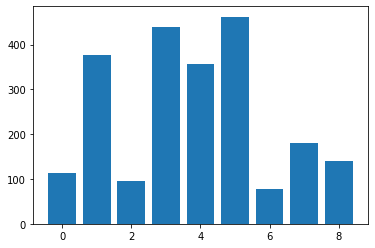

In [49]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [51]:
class_names


array(['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
       'melanoma', 'nevus', 'pigmented benign keratosis',
       'seborrheic keratosis', 'squamous cell carcinoma',
       'vascular lesion'], dtype='<U26')

In [ ]:
import os
os.chdir("/content/drive/MyDrive/CNN/augmented")
for i in class_names:
  os.mkdir(str(i))



In [34]:
import Augmentor
path_to_training_dataset= '/content/drive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
output = "/content/drive/MyDrive/CNN/augmented/"
for i in class_names:
    p = Augmentor.Pipeline(source_directory = path_to_training_dataset + i,output_directory = output+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1791CC6890>: 100%|██████████| 500/500 [00:22<00:00, 22.33 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F178E18DE90>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/dermatofibroma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F178E24F710>: 100%|██████████| 500/500 [00:22<00:00, 22.00 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F178E125590>: 100%|██████████| 500/500 [01:46<00:00,  4.70 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F178EA75F10>:   0%|          | 1/500 [00:00<01:03,  7.84 Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F178E200D10>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1791EA8810>: 100%|██████████| 500/500 [00:23<00:00, 21.68 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/seborrheic keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F178E1C9A90>: 100%|██████████| 500/500 [00:48<00:00, 10.24 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F178E170D90>: 100%|██████████| 500/500 [00:22<00:00, 22.63 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN/augmented/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F179624A6D0>: 100%|██████████| 500/500 [00:22<00:00, 22.37 Samples/s]


In [20]:
tf.keras.backend.clear_session()
from keras.preprocessing.image import ImageDataGenerator

data_train = ImageDataGenerator(
    rescale=1./255, #rescaling [0,1]
    validation_split = 0.2,
    rotation_range=15,
    width_shift_range=0.4, #shift the image to the left or right horzontaly
    height_shift_range=0.4,# shift vertically
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, #Randomly flip inputs horizontally.
    fill_mode='nearest', #filling the area
  
)

train_data = data_train.flow_from_directory("/content/drive/MyDrive/CNN/augmented",target_size =(180,180),batch_size =32,subset = 'training')

data_val = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)
val_data = data_val.flow_from_directory("/content/drive/MyDrive/CNN/augmented",target_size = (180,180),batch_size =32,subset = 'validation')

Found 3600 images belonging to 9 classes.
Found 900 images belonging to 9 classes.


In [28]:
from tensorflow.keras.layers import Dense,Input,Activation,Conv1D,Concatenate,MaxPool1D,Flatten,Dropout

def model_3():
  model_3 = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3), use_bias=True,kernel_initializer='he_normal',kernel_regularizer='l2'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),    
    # layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout( 0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 4

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout( 0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', use_bias=True),   
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout( 0.2), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # layer 5
    tf.keras.layers.Dense(1000, activation = 'relu', use_bias=True),
    tf.keras.layers.Dropout( 0.2),
    # layer 6
    tf.keras.layers.Dense(9, activation='softmax', use_bias=True)
    
])


  return model_3

In [29]:
model_3 = model_3()
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 178, 178, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 89, 89, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 89, 89, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 43, 43, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 41, 41, 128)      

In [30]:
from tensorflow.keras.callbacks import  ModelCheckpoint, ReduceLROnPlateau, CSVLogger, TensorBoard, EarlyStopping

def Train_Model_3():
  batch = 32
  epochs =30 

  opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.01,
    epsilon=1e-07,
    centered=True,
    name="RMSprop",
)
  metrics = ["acc", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()] #sice its clasification 
                                                                             #using recall and Precsion 
  model_3.compile(loss="categorical_crossentropy", optimizer=opt, metrics=metrics) 
  callbacks = [
        ModelCheckpoint("/content/drive/MyDrive/CNN/Model/model_3.h5",monitor = 'val_acc',save_best_only=True),
        ReduceLROnPlateau(monitor='val_acc', factor=0.6,mode='max', patience=5), #Reducing learing rate by factor of(0.5),
                                                                       # new_lr = lr * factor.
        CSVLogger("/content/drive/MyDrive/CNN/Model/data.csv"),
        TensorBoard(),
        EarlyStopping(monitor='val_acc', patience=15,mode= 'max',restore_best_weights=True) #stop traing is val_loss does not change
    ]                                                                             #after 20 epochs.
  history = model_3.fit(train_data,steps_per_epoch=3600   //32,
                      validation_data = val_data,validation_steps = 900 /32,
                      epochs=epochs,
                      callbacks=callbacks)
  tf.keras.models.save_model(model_3,'/content/drive/MyDrive/CNN/Model/final_model_3.h5')
  
  
  return history


In [31]:
import sys
if __name__ == '__main__':
  config = tf.compat.v1.ConfigProto()
  config.gpu_options.allow_growth = True
  config.allow_soft_placement = True
  sess = tf.compat.v1.Session(config=config)
  tf.compat.v1.keras.backend.set_session(sess)
  if len(sys.argv) > 1:
    gpu = sys.argv[1]
device = '/device:GPU:0' #using Gpu for paced training
with tf.device(device):
  history_3 = Train_Model_3()


Epoch 1/30
112/112 [==============================] - 82s 716ms/step - loss: 3.6288 - acc: 0.3100 - recall_1: 0.2228 - precision_1: 0.3687 - val_loss: 3.8102 - val_acc: 0.1111 - val_recall_1: 0.0800 - val_precision_1: 0.1283
Epoch 2/30
112/112 [==============================] - 79s 707ms/step - loss: 2.9678 - acc: 0.3848 - recall_1: 0.2651 - precision_1: 0.4849 - val_loss: 4.6197 - val_acc: 0.1767 - val_recall_1: 0.1289 - val_precision_1: 0.2231
Epoch 3/30
112/112 [==============================] - 79s 706ms/step - loss: 2.7356 - acc: 0.4285 - recall_1: 0.2867 - precision_1: 0.5500 - val_loss: 4.4054 - val_acc: 0.2756 - val_recall_1: 0.2222 - val_precision_1: 0.3210
Epoch 4/30
112/112 [==============================] - 79s 702ms/step - loss: 2.6462 - acc: 0.4417 - recall_1: 0.2971 - precision_1: 0.5702 - val_loss: 4.5710 - val_acc: 0.2911 - val_recall_1: 0.2722 - val_precision_1: 0.3070
Epoch 5/30
112/112 [==============================] - 78s 698ms/step - loss: 2.5413 - acc: 0.4554 - 

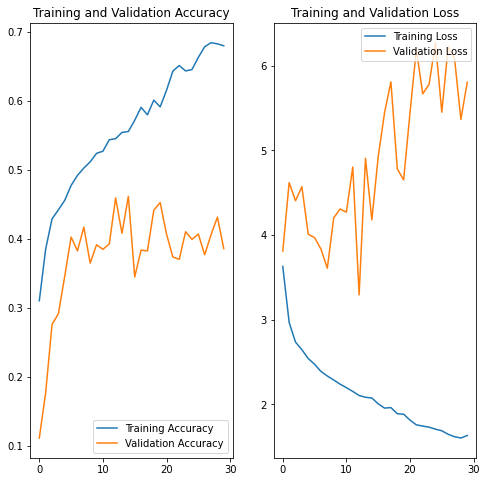

In [32]:
import matplotlib.pyplot as plt

epochs =30
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']

loss=history_3.history['loss']
val_loss=history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#  Model-3 Summary

1. Here the arctitecture diffrent from model-1 and model-2, I used simple arctitecture as previous architercture was not give good result.

2. Optimizer = Same as for Model-1 and Model-2

3. Here I observed that there a silgtly a case of overfitting, but i am not sure as the number of epochs is only 30, we have to confirm for more epochs and finaal we can do Batch Normalization layers and more dropout layers can would probabbly fix this.

4. I augmented the data as 500 samples from each class which gives as total of 4500 images.

5. We wolud need more data and more number of epoch to reach a better accuracy

6. One way would be to incraese the augmentation parameter, since i have less resource i stick to only rotation.

# Conclusion

1. I think we can also used other architectures like VGG-16 and can train them, or we can use pre-trained networks but we have to  tune al least half of the layers of pre-trained model, as Vgg-16 has not been trained in medical images data.
2. I think using augmrnter consume space in hardrive, as we need to store all the augmented images, we should use augmentation in batch therefore we will not store all the images locally, we generate augmened images in batches and use them in training .

3. We would need more complex arctiture and more data for acciving more acuuracy.


In [34]:
from prettytable import PrettyTable

In [35]:
x = PrettyTable(["Model", "No of Epochs", "Train Acc", "Validation Acc"])
x.add_row(["Model-1", 20, "84 %","33 %"])
x.add_row(["Model-2", 20, "54 %", "38 %"])
x.add_row(["Model-3", 30, "68 %", "42%"])
print(x)


+---------+--------------+-----------+----------------+
|  Model  | No of Epochs | Train Acc | Validation Acc |
+---------+--------------+-----------+----------------+
| Model-1 |      20      |    84 %   |      33 %      |
| Model-2 |      20      |    54 %   |      38 %      |
| Model-3 |      30      |    68 %   |      42%       |
+---------+--------------+-----------+----------------+
